<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Calculo/Actividad_06_Diferenciacio%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Jesús Armando Cañas Gamboa
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
def five_point_derivative(x, f, h):
    '''
    Esta función calcula la derivada de una función usando 
    el metodo de la derivada de cinco puntos.

    Entradas
    x: puntos 
    f: función a derivar
    h: espaciado
    n = len(x)

    Salida:
    Derivada: array
    '''
    
    n = len(x)
    
    f_prime = np.zeros_like(x)

    #Calculo de la derivada cinco puntos
    for i in range(n):
        if i == 0 : #Derivada en el extremo inferior(adelante)
            f_prime[i] = (-25* f(x[i]) + 48* f(x[i] + h) - 36*f(x[i]+ 2*h) + 16* f(x[i]+ 3*h) - 3*f(x[i]+ 4*h)) / (12 * h)
            
        elif i == n-1: #Derivada en el extremo superior del intervalo(atras)
            f_prime[i] = -1* (-25* f(x[i]) + 48* f(x[i]-h) - 36*f(x[i] - 2*h) + 16* f(x[i] - 3*h) - 3*f(x[i] - 4*h)) / (12 * h)
            
        else: #Derivada en los valores intermedios
            f_prime[i] = (f(x[i]- 2*h) - 8*f(x[i]-h) + 8*f(x[i]+h) - f(x[i] + 2*h))/(12*h)
                                            
    return f_prime
                                            


In [3]:
f = lambda x : np.cos(x) #Definimos la función

x = np.linspace(0, 2*np.pi,10 ) #Hacemos un array con 10 puntos equiespaciados

espaciado = np.linspace(0.1, 1, 10) #Hacemos un array para los valores de h

d = []
e = []
#Definimos el punto en donde se calculara la derivada
punto = np.pi/8

#Calculamos la derivada para cada valor de h
for h in espaciado:
    dydx = five_point_derivative(x, f, h)
    #Interpolamos para luego evalluar en el punto
    pol = CubicSpline(x, dydx)
    
    e.append(h)
    d.append(pol(punto))
#Creamos el df con los datos
df = pd.DataFrame({'h': e, 'derivada' : d  } )

    

In [4]:
df #Mostramos

,h,derivada
0,0.1,-0.38643839584836487
1,0.2,-0.3863950317086873
2,0.3,-0.38615379388913984
3,0.4,-0.3853774998444219
4,0.5,-0.3835292699856012
5,0.6,-0.3799085472998655
6,0.7,-0.37374379764358223
7,0.8,-0.36433274343761207
8,0.9,-0.3512112340713745
9,1.0,-0.334324647635664


In [5]:
valor_exa = -1 * np.sin(punto) #Derivada exacta

error_convergencia = abs(df - valor_exa) #Df con el error de convergencia
error_convergencia['h'] = df['h']

In [6]:
error_convergencia #Mostramos

,h,derivada
0,0.1,0.003755
1,0.2,0.003712
2,0.3,0.00347
3,0.4,0.002694
4,0.5,0.000846
5,0.6,0.002775
6,0.7,0.00894
7,0.8,0.018351
8,0.9,0.031472
9,1.0,0.048359


In [7]:
dydx = lambda x : -1* np.sin(x) #Funcion de derivada exacta

d2x = five_point_derivative(x, dydx , 0.05) #Calcula de la derivada usando five_point
pol = CubicSpline(x, d2x) #Interpolación

print(f' el error es {abs(-1 * np.cos(punto) - pol(punto))}') #Imprimimos el error 

 el error es 0.004084530715879664


# 2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [8]:
def diferencias_finitas(x, f, h):
    '''
    Esta función calcula la derivada de una función usando 
    el metodo de diferencias finitas.

    Entradas
    x: puntos 
    f: función a derivar
    h: espaciado
    n = len(x)

    Salida:
    Derivada: array
    '''    
    
    n = len(x)

    f_prime = np.zeros_like(x)

    for i in range(n):
        if i == 0 :
            f_prime[i] = (f(x[i] + h ) - f(x[i])) / h
        elif i == n-1:
            f_prime[i] = (f(x[i]) - f(x[i] - h)) / h
        else:
            f_prime[i] = (f(x[i] + h) - f(x[i] - h))/ (2 * h)
    return f_prime
                                            


In [9]:
e = np.e
f = lambda x: x * e **x #Definimos la función

#Hacemos un array de 6 puntos equiespaciados dentro del intervalo dado
x = np.linspace(1.8, 2.2, 6)

#Hacemos un array para distintos valores de h
espaciado = np.linspace(0.01, 0.1, 10 )

#listas para el df
lista_dx = []
lista_scp = []
lista_gr = []
p = 2.0
#Calculalos el valor de la derivada para cada h usando los 3 metodos
for h in espaciado:
    #Diferencias finitas
    dydx = diferencias_finitas(x, f, h) #Evaluamos 
    #Interpolamos y calulamos para el punto dado
    pol = CubicSpline(x, dydx)
    lista_dx.append(pol(2.0))
    
    
    #Definimos un array con los puntos equiespaciados en h
    puntos = np.arange(min(x) , max(x) + h, h)
    
    #Calculo de scipy
    #interpolamos los puntos de la funcion
    pol_or = CubicSpline(puntos, f(puntos))
    #Calculamos la derivada usando derivate y evaluamos
    dpol = pol_or.derivative()
    #Guardamos en la lista
    lista_scp.append(dpol(p))

    
    #Calculo gradient
    d_gradient = np.gradient(f(puntos), h)
    #Interpolamos para calcular el valor buscado
    pol_gradient = CubicSpline(puntos , d_gradient)
    
    lista_gr.append(pol_gradient(p))
    
derivadas = pd.DataFrame({ 'h': espaciado , 'diferencias' : lista_dx, 'gradient': lista_gr, 'scipy': lista_scp})

In [10]:
derivadas

,h,diferencias,gradient,scipy
0,0.01,22.16685517368615,22.16778405577724,22.167168293918543
1,0.02,22.167770151734324,22.16963138445713,22.167168250957975
2,0.03,22.169916724371944,22.172736459029004,22.167175690878576
3,0.04,22.173295085016058,22.17702147507689,22.167166739699756
4,0.05,22.1779055305577,22.18256485779763,22.167164696905854
5,0.06,22.18374846139005,22.189689750274326,22.16709383471693
6,0.07,22.190824381445527,22.203317277493124,22.167249258492664
7,0.08,22.199133898242376,22.223497823998958,22.16710882880334
8,0.09,22.20867772294101,22.21793725047866,22.167217597226564
9,0.10,22.219456670409578,22.228786880307315,22.167858193521543


In [11]:
df = lambda x: e**x + x* e**x

In [12]:
#Calculamos el error restando el valor original de la derivada
error = abs(df(p) - derivadas)
error['h'] = derivadas['h']

In [13]:
error

,h,diferencias,gradient,scipy
0,0.01,0.000313,0.000616,0.0
1,0.02,0.000602,0.002463,0.0
2,0.03,0.002748,0.005568,0.000007
3,0.04,0.006127,0.009853,0.000002
4,0.05,0.010737,0.015397,0.000004
5,0.06,0.01658,0.022521,0.000074
6,0.07,0.023656,0.036149,0.000081
7,0.08,0.031966,0.05633,0.000059
8,0.09,0.041509,0.050769,0.000049
9,0.10,0.052288,0.061619,0.00069


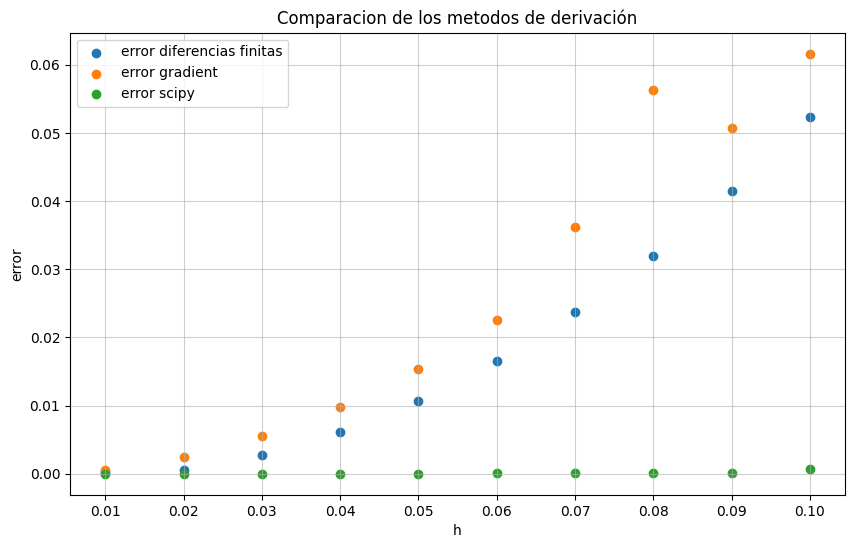

In [14]:
#Graficamos el error en función de h
h = error['h']
plt.figure(figsize=(10,6))
plt.title('Comparacion de los metodos de derivación')
plt.scatter(h, error['diferencias'], label = 'error diferencias finitas')
plt.scatter(h, error['gradient'], label = 'error gradient')
plt.scatter(h, error['scipy'], label = 'error scipy')
plt.xlabel('h')
plt.xticks(h)
plt.ylabel('error')
plt.legend()
plt.grid('--', alpha = 0.6)
plt.show()


El valor optimo de h es 0.01 ya que es el que posee menos error